# 基础设置

In [219]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(style='whitegrid',palette="Set2")
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']= False
from warnings import filterwarnings
filterwarnings('ignore')

# 加载数据

In [220]:
data_customer = pd.read_excel(r"D:\BaiduNetdiskDownload\机器学习实战\cumcm2018c1.xlsx",header = 0)
data_customer.head()

,会员卡号,出生日期,性别,登记时间
0,c68b20b4,2002-11-02 00:00:00,0.0,2013-05-11 00:00:00.000
1,1ca15332,NaN,0.0,2004-11-04 16:31:52.436
2,a37cc182,1967-02-17 00:00:00,0.0,2004-12-31 21:24:34.216
3,2ab88539,1982-06-01 00:00:00,0.0,2010-11-19 00:00:00.000
4,b4c77269,1964-02-05 00:00:00,0.0,2007-12-14 00:00:00.000


In [221]:
data_consume = pd.read_csv(r"D:\BaiduNetdiskDownload\机器学习实战\cumcm2018c2.csv",header = 0)
data_consume.head()

,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称
0,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,290.0,270.20,兰芝化妆品正价瓶,270.20,6,25bb,8077.0,兰芝柜
1,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,325.0,302.80,兰芝化妆品正价瓶,302.80,6,25bb,8077.0,兰芝柜
2,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,195.0,181.80,兰芝化妆品正价瓶,181.80,6,25bb,8077.0,兰芝柜
3,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,270.0,251.55,兰芝化妆品正价瓶,251.55,6,25bb,8077.0,兰芝柜
4,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,2,245.0,456.55,兰芝化妆品正价瓶,456.55,6,25bb,8077.0,兰芝柜


## 数据说明

- 两个表包含了如会员卡号，消费产生时间，性别，出生时间，商品编码，销售数量，商品售价，消费金额，商品名称，此次消费的会员积分，收银机号，单据号，柜组编码，柜组名称，等级时间等 15 个特征。
- 数据集分为两部分，.xlsx结尾的是会员信息表，.csv结尾的是销售流水表。其中，会员信息表共有将近19万条记录，销售流水表共有接近189万条记录，其包括2015-01-01到2018-01-03之间所产生的数据。

## 问题描述

本项目主要围绕着“百货商店会员用户画像描绘与价值分析”内容进行，结合目前百货商场的数据情况，可以实现以下目标：

* 借助百货商场会员用户数据，对会员用户进行分群。
* 对不同的会员用户类别进行特征分析，比较不同类别会员用户的会员用户价值。
* 对不同价值的会员用户类别提供个性化服务，制定相应的营销策略。

# 探索数据

## 会员数据探索

### 缺失值和数据类型

In [222]:
data_customer.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194760 entries, 0 to 194759
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   会员卡号    194760 non-null  object        
 1   出生日期    160572 non-null  object        
 2   性别      185325 non-null  float64       
 3   登记时间    182076 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.9+ MB


会员数据中出生日期特征的数据类型需要调整为datetime。

In [223]:
data_customer['出生日期'] = pd.to_datetime(data_customer['出生日期'],format = '%Y-%m-%d',errors = 'coerce') 
# errors = 'coerce'代表非法时间转换为空值NAT

In [224]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194760 entries, 0 to 194759
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   会员卡号    194760 non-null  object        
 1   出生日期    160553 non-null  datetime64[ns]
 2   性别      185325 non-null  float64       
 3   登记时间    182076 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 5.9+ MB


* 缺失值（<span class="girk">待后续处理</span>）
    - <span class="girk">出生日期</span>缺失值最多(34207)
    - 性别和登记时间也存在一定程度的缺失情况
* 值含义（<span class="girk">待后续论证</span>）
    - 性别特征中，源数据中使用的是0/1，目前仍不清楚0/1分别代表什么。

### 查看数据分布

#### 会员卡号

In [225]:
target_df = data_customer['会员卡号'].value_counts().reset_index()
target_df = target_df[target_df['会员卡号'] > 1]
target_df

,index,会员卡号
0,b87a212d,2
1,a11009e7,2
2,20e70a95,2
3,d8fc30a2,2
4,ef1a4b8c,2
5,aba3e78d,2


发现以上6个会员号对应多行数据，<span class="girk">意味着会员数据表需要进一步处理，直到留下唯一的会员信息</span>。

In [226]:
data_customer[data_customer['会员卡号'].isin(list(target_df['index']))].sort_values('会员卡号')

,会员卡号,出生日期,性别,登记时间
42980,20e70a95,1969-09-28,0.0,2014-04-19 00:00:00.000
66024,20e70a95,1753-01-01,0.0,2017-06-01 11:22:05.356
34750,a11009e7,1977-09-19,0.0,2013-04-30 00:00:00.000
135680,a11009e7,1967-10-26,0.0,2010-12-18 00:00:00.000
63395,aba3e78d,1753-01-01,0.0,2017-04-09 17:53:40.583
69791,aba3e78d,1959-10-27,0.0,2005-11-10 17:14:52.356
95001,b87a212d,1984-01-01,0.0,2012-08-26 00:00:00.000
119556,b87a212d,1988-10-08,1.0,2015-03-11 00:00:00.000
92269,d8fc30a2,NaT,0.0,2012-05-20 00:00:00.000
146744,d8fc30a2,1963-11-08,0.0,2016-09-03 00:00:00.000


根据年龄异常值以及登记时间早晚,人为删除会员卡号的重复信息，并更新data_customer数据集：

In [227]:
data_customer.drop([66024,135680,63395,95001,92269,99579],inplace = True)
data_customer.reset_index(drop =True,inplace = True)

#### 出生日期

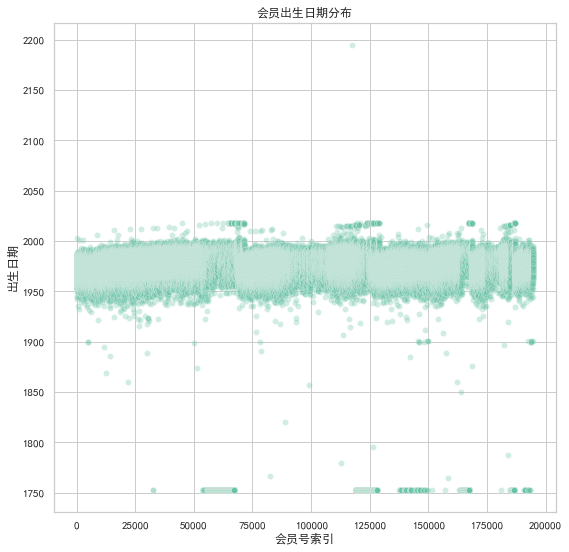

In [228]:
plt.figure(figsize=(9,9))
sns.scatterplot(x = data_customer.index,
                y = data_customer['出生日期'],alpha = 0.3)
plt.xlabel(u'会员号索引')
plt.title(u'会员出生日期分布')
plt.show()

从上图可以发现绝大多数会员的生日日期分布于1940~2000年之间，同时还发现不少会员的生日存在明显异常，比较极端的是部分会员的出生日期分布于1750年，还有一个会员的生日在2200年。对应计算一下会员年龄：

In [229]:
from datetime import datetime,timedelta
now = datetime(2018,1,3)
data_customer['年龄'] = now - data_customer['出生日期']
data_customer['年龄'] = data_customer['年龄'].astype('timedelta64[Y]')

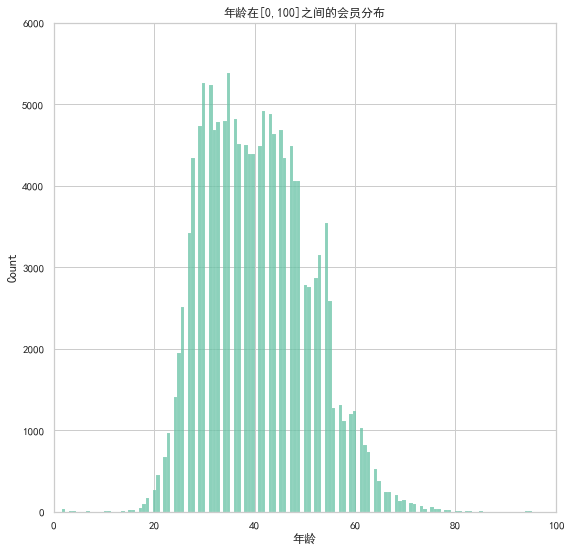

In [230]:
# 刨除异常值后，年龄的分布情况
plt.figure(figsize=(9,9))
sns.histplot(data_customer['年龄'])
plt.xlim([0,100])
plt.ylim([0,6000])
plt.title(u'年龄在[0,100]之间的会员分布')
plt.show()

* <span class="girk">会员的年龄</span>由于出生日期存在异常值得关系而存在<span class="girk">异常值</span>，后续链表之后仍需注意此问题
* 刨除异常值后，<span class="girk">会员的年龄分布主要集中在20~60岁之间</span>。

#### 性别分布

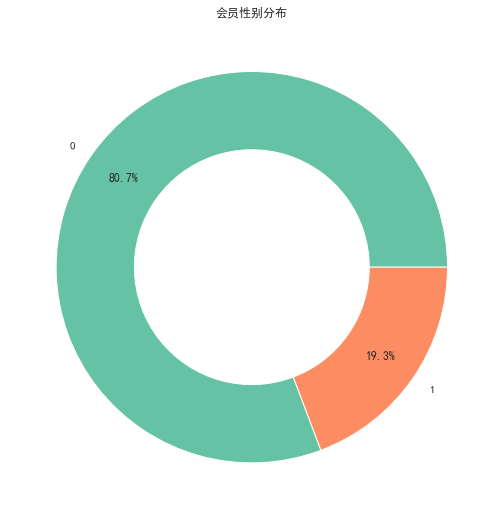

In [231]:
plt.figure(figsize=(9,9))
plt.pie(data_customer['性别'].value_counts().values,labels = [0,1],
        autopct='%1.1f%%',
        counterclock=True,
        wedgeprops={'width':0.4},
        pctdistance=0.8)
plt.title(u'会员性别分布')
plt.show()

由于源数据中未标注性别特征0/1分别代表什么，考虑到百货商场的属性，再参考会员的性别分布，<span class="girk">可推测0代表女性，1代表男性，且女性占比80%</span>。

#### 登记时间

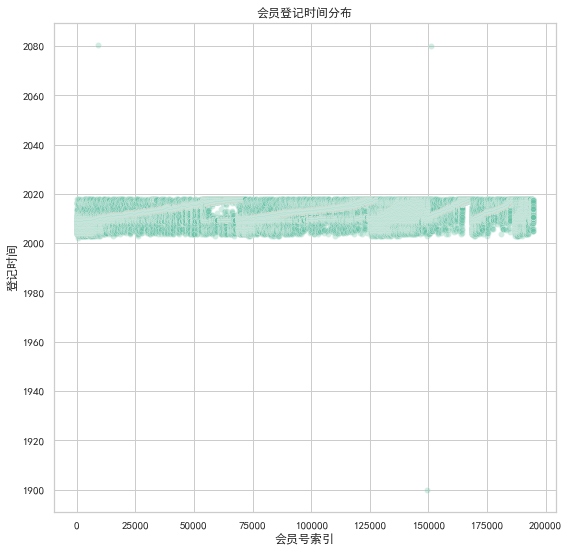

In [232]:
plt.figure(figsize=(9,9))
sns.scatterplot(x = data_customer.index,
                y = data_customer['登记时间'],alpha = 0.3)
plt.xlabel(u'会员号索引')
plt.title(u'会员登记时间分布')
plt.show()

相比于会员的生日日期分布异常值的比例，会员登记时间明显存在的异常点很少。于是我们着重看看会员登记时间在2000~2020年这一区间内的分布情况。

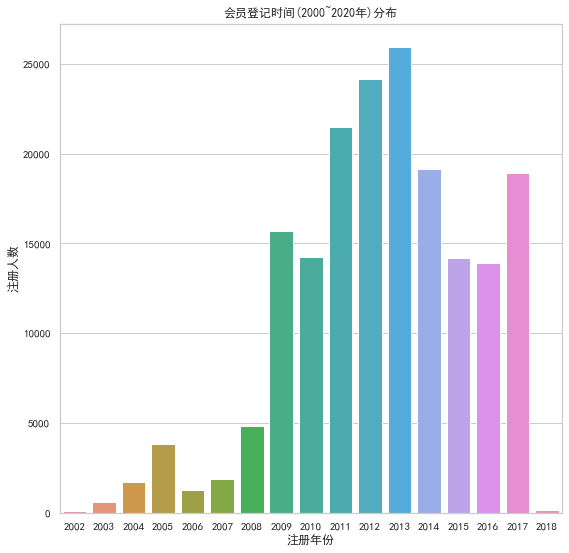

In [233]:
target = data_customer['登记时间'].dt.year
plt.figure(figsize = (9,9))
target_df = target.value_counts().reset_index()
target_df['index'] = target_df['index'].astype('int')
target_df = target_df[(target_df['index'] >= 2000)&(target_df['index'] <= 2020)]
sns.barplot(data = target_df,
           x = 'index',
           y = '登记时间')
plt.xlabel(u'注册年份')
plt.ylabel(u'注册人数')
plt.title(u'会员登记时间(2000~2020年)分布')
plt.show()

由图可知，<span class="girk">会员表中绝大多数的会员注册年份集中于2009~2017年</span>。

## 链表后销费数据探索

In [234]:
# 链表操作
data_merged = pd.merge(data_consume,data_customer,how = 'left',on = '会员卡号')
data_merged.head(50)

,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称,出生日期,性别,登记时间,年龄
0,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,290.0,270.20,兰芝化妆品正价瓶,270.20,6,25bb,8077.0,兰芝柜,NaT,NaN,NaT,NaN
1,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,325.0,302.80,兰芝化妆品正价瓶,302.80,6,25bb,8077.0,兰芝柜,NaT,NaN,NaT,NaN
2,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,195.0,181.80,兰芝化妆品正价瓶,181.80,6,25bb,8077.0,兰芝柜,NaT,NaN,NaT,NaN
3,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,270.0,251.55,兰芝化妆品正价瓶,251.55,6,25bb,8077.0,兰芝柜,NaT,NaN,NaT,NaN
4,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,2,245.0,456.55,兰芝化妆品正价瓶,456.55,6,25bb,8077.0,兰芝柜,NaT,NaN,NaT,NaN
5,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,230.0,214.30,兰芝化妆品正价瓶,214.30,6,25bb,8077.0,兰芝柜,NaT,NaN,NaT,NaN
6,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,310.0,288.85,兰芝化妆品正价瓶,288.85,6,25bb,8077.0,兰芝柜,NaT,NaN,NaT,NaN
7,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,9,358.0,3002.15,兰芝化妆品正价瓶,3002.15,6,25bb,8077.0,兰芝柜,NaT,NaN,NaT,NaN
8,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,235.0,218.95,兰芝化妆品正价瓶,218.95,6,25bb,8077.0,兰芝柜,NaT,NaN,NaT,NaN
9,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,330.0,307.50,兰芝化妆品正价瓶,307.50,6,25bb,8077.0,兰芝柜,NaT,NaN,NaT,NaN


### 缺失值和数据类型

In [235]:
data_merged.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893532 entries, 0 to 1893531
Data columns (total 16 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   会员卡号       876046 non-null   object        
 1   消费产生的时间    1893532 non-null  object        
 2   商品编码       1893532 non-null  object        
 3   销售数量       1893532 non-null  int64         
 4   商品售价       1893532 non-null  float64       
 5   消费金额       1893532 non-null  float64       
 6   商品名称       1893532 non-null  object        
 7   此次消费的会员积分  876046 non-null   float64       
 8   收银机号       1893532 non-null  int64         
 9   单据号        1893532 non-null  object        
 10  柜组编码       876046 non-null   float64       
 11  柜组名称       856576 non-null   object        
 12  出生日期       482129 non-null   datetime64[ns]
 13  性别         495467 non-null   float64       
 14  登记时间       474446 non-null   datetime64[ns]
 15  年龄         482129 non-null   float64       
dtype

In [236]:
# 修改'消费产生的时间'特征的数据类型
data_merged['消费产生的时间'] = pd.to_datetime(data_merged['消费产生的时间'])

In [237]:
data_merged.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893532 entries, 0 to 1893531
Data columns (total 16 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   会员卡号       876046 non-null   object        
 1   消费产生的时间    1893532 non-null  datetime64[ns]
 2   商品编码       1893532 non-null  object        
 3   销售数量       1893532 non-null  int64         
 4   商品售价       1893532 non-null  float64       
 5   消费金额       1893532 non-null  float64       
 6   商品名称       1893532 non-null  object        
 7   此次消费的会员积分  876046 non-null   float64       
 8   收银机号       1893532 non-null  int64         
 9   单据号        1893532 non-null  object        
 10  柜组编码       876046 non-null   float64       
 11  柜组名称       856576 non-null   object        
 12  出生日期       482129 non-null   datetime64[ns]
 13  性别         495467 non-null   float64       
 14  登记时间       474446 non-null   datetime64[ns]
 15  年龄         482129 non-null   float64       
dtype

* 缺失值
    - 消费数据表中共有1,893,532条数据，其中有会员卡号的数据行数为876,046，说明<span class="girk">这份数据表中包含了大量的非会员的消费信息</span>。
    - 柜组编码特征对应的非空数据行数与会员卡号非空数据行数相同，说明<span class="girk">只有会员消费才记录柜组编码</span>。
    - 柜组名称(856,576非空行)和柜组编码(876,046非空行)存在将近20,000行的差值，后续如有需要，<span class="girk">可尝试利用已有柜组名称和柜组编码的对应关系进行填补</span>。
    - 根据会员卡号的非空值有876,046条数据，而链表后对应的会员表特征平均非空值数量仅有480,000左右，可判断<span class="girk">消费数据表中有大量的会员卡号并未体现在会员表中</span>。<span class="pirk">后续在聚类过程如果仅采用RFM模型，则data_merged中只要会员卡号非空的数据均可使用；若在RFM模型中引入性别，入会时间，平均折扣等特征，则需要额外要求新增特征对应的值不能为空</span>。
* 数据类型
    - <span class="girk">消费数据表中不存在明显的类别型特征</span>。
    - 合并表中仅有性别是明显的类别型特征。

### 统计分析

#### 消费金额的整体分布情况

In [238]:
data_merged['消费金额'].describe()

count    1.893532e+06
mean     1.047361e+03
std      2.697462e+03
min     -6.712575e+05
25%      3.100000e+02
50%      5.640000e+02
75%      1.098000e+03
max      1.342515e+06
Name: 消费金额, dtype: float64

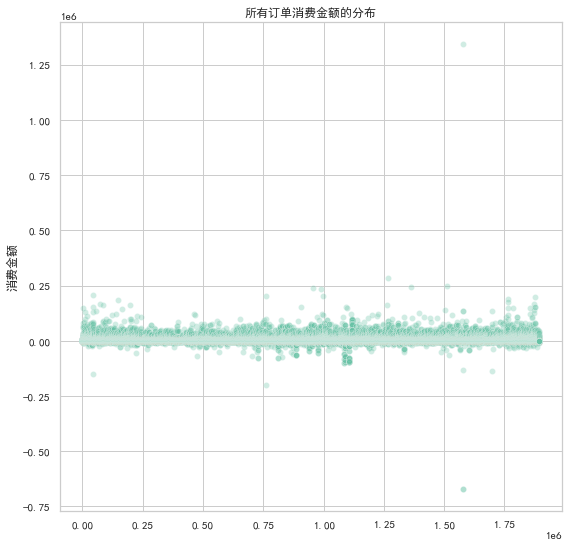

In [239]:
plt.figure(figsize = (9,9))
sns.scatterplot(data = data_merged,
                x = data_merged.index,
                y = '消费金额',
               alpha = 0.3)
plt.title(u'所有订单消费金额的分布')
plt.show()

* 消费金额数据中存在明显的异常值，比如单笔订单消费金额达到了(1,342,515元)。
* 消费金额存在负值的情况，意味着消费数据中存在退单的情况。
* 绝大多数的订单金额分布于±250,000的区间内。

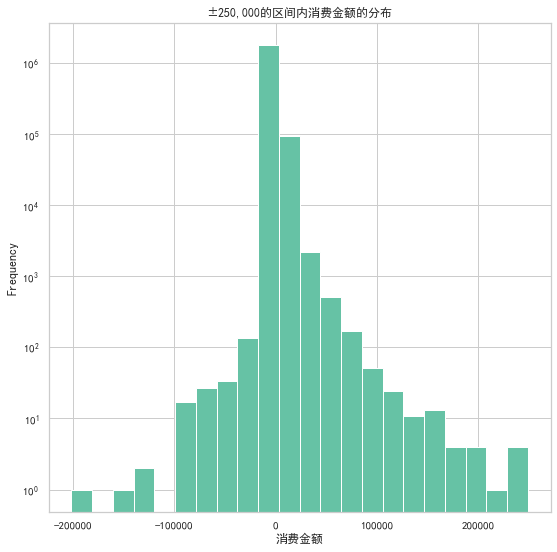

In [240]:
plt.figure(figsize = (9,9))

data_merged[(data_merged['消费金额'] >= -250000)&(data_merged['消费金额'] <= 250000)]['消费金额'].plot(kind = 'hist',logy = True,bins = 22)

plt.title(u'±250,000的区间内消费金额的分布')
plt.xlabel('消费金额')
plt.show()

在研究±250,000的区间内消费金额的分布后，可得结论：大多数的订单金额分布于±100,000区间内。

#### 会员/非会员消费金额占比

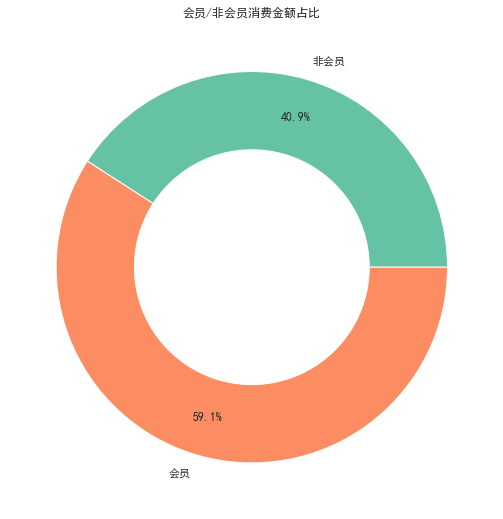

In [241]:
nan_customer_id = np.ones((len(data_merged),1))
for index,item in enumerate(data_merged['会员卡号']):
    if pd.isna(item):
        nan_customer_id[index] = 0
target_df = pd.DataFrame(np.c_[nan_customer_id,data_merged['消费金额'].values.reshape(-1,1)],columns = ['会员标签','消费金额'])
target_df = target_df.groupby('会员标签')['消费金额'].sum().reset_index()

plt.figure(figsize = (9,9))
plt.pie(target_df['消费金额'],
        labels = ['非会员','会员'],
        autopct='%1.1f%%',
        counterclock=True,
        wedgeprops={'width':0.4},
        pctdistance=0.8)
plt.title(u'会员/非会员消费金额占比')
plt.show()

#### 会员/非会员订单数占比

In [242]:
# 在以单据号作为分组依据，['会员卡号','消费产生的时间']对应的情况下，计数情况如下
data_merged.groupby('单据号')['会员卡号','消费产生的时间'].value_counts().reset_index()

,单据号,会员卡号,消费产生的时间,0
0,00f8,49f30e5f,2017-11-26 22:30:21.516,10
1,00f8,abac6ba5,2015-02-14 20:34:50.626,3
2,00f8,7f0ecd29,2016-08-27 19:02:36.500,3
3,00f8,533eb75f,2016-11-25 23:14:16.063,3
4,00f8,c5973534,2016-11-26 21:04:51.656,2
...,...,...,...,...
459145,fee6,0e6b901e,2015-07-07 21:05:09.203,1
459146,fee6,0f78a9ec,2017-11-26 12:49:31.640,1
459147,fee6,0fa9c8b9,2015-03-27 18:48:26.016,1
459148,fee6,0fabb449,2015-04-02 16:39:55.533,1


可以看到消费数据中一个单据号存在对应多笔订单的情况，于是得到结论：<span class="girk">不能使用单据号来判断订单数，应使用'消费产生的时间'作为判断订单数的合理依据</span>。

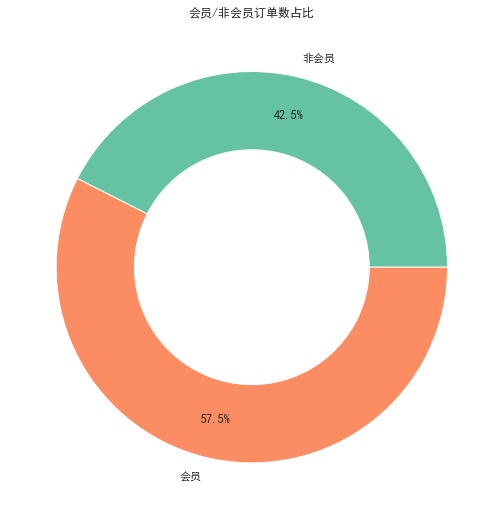

In [243]:
target_df = data_merged[pd.isna(data_merged['会员卡号']) == False]
customer_order_num = len(target_df['消费产生的时间'].unique()) # 会员订单数量
target_df = data_merged[pd.isna(data_merged['会员卡号']) == True]
not_customer_order_num = len(target_df['消费产生的时间'].unique()) # 会员订单数量

plt.figure(figsize = (9,9))
plt.pie([not_customer_order_num,customer_order_num],
        labels = ['非会员','会员'],
        autopct='%1.1f%%',
        counterclock = True,
        wedgeprops = {'width': 0.4},# 该参数用于饼状图中间留有空白的比例为1-0.4 = 0.6
       pctdistance = 0.8)# 该参数用于调整百分比数值展现的位置
plt.title(u'会员/非会员订单数占比')
plt.show()

综上可以看出，会员消费总金额占比接近60%，会员订单数占总订单数的比重同样接近60%。<span class="girk">未来如果可以增加拉新入会的会员人数，将更加有利于用户画像的描述与价值分析</span>。

#### 会员下单时间偏好分析

In [244]:
# 添加字段
data_merged['消费时间-年'] = data_merged['消费产生的时间'].dt.year
data_merged['消费时间-月'] = data_merged['消费产生的时间'].dt.month
data_merged['消费时间-周几'] = data_merged['消费产生的时间'].dt.weekday
data_merged['消费时间-小时'] = data_merged['消费产生的时间'].dt.hour
data_merged['消费时间-季度'] = data_merged['消费产生的时间'].dt.quarter

In [245]:
data_merged.head()

,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,...,柜组名称,出生日期,性别,登记时间,年龄,消费时间-年,消费时间-月,消费时间-周几,消费时间-小时,消费时间-季度
0,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,290.0,270.20,兰芝化妆品正价瓶,270.20,6,25bb,...,兰芝柜,NaT,NaN,NaT,NaN,2015,1,3,0,1
1,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,325.0,302.80,兰芝化妆品正价瓶,302.80,6,25bb,...,兰芝柜,NaT,NaN,NaT,NaN,2015,1,3,0,1
2,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,195.0,181.80,兰芝化妆品正价瓶,181.80,6,25bb,...,兰芝柜,NaT,NaN,NaT,NaN,2015,1,3,0,1
3,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,270.0,251.55,兰芝化妆品正价瓶,251.55,6,25bb,...,兰芝柜,NaT,NaN,NaT,NaN,2015,1,3,0,1
4,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,2,245.0,456.55,兰芝化妆品正价瓶,456.55,6,25bb,...,兰芝柜,NaT,NaN,NaT,NaN,2015,1,3,0,1


In [246]:
# 创建会员消费的数据集
customer_consume_df = data_merged[(pd.isna(data_merged['会员卡号']) == False) & (data_merged['消费时间-年'] != 2018)]

In [247]:
# 定义绘图函数
def plot_ordertime(df,colname_time_precision,colname_year = '消费时间-年',colname_customer_num = '会员卡号',colname_order_num = '消费产生的时间',colname_sales = '消费金额',figsize = (20,12)):
    plt.figure(figsize = figsize)
    # 绘制第一张图：以年度分组每个time_precision人均订单数
    plt.subplot(221)
    target_df = df[[colname_year,colname_time_precision,colname_customer_num]].value_counts().reset_index()
    target_df = target_df.groupby([colname_year,colname_time_precision])[colname_customer_num].count().reset_index()

    target_df1 = df[[colname_year,colname_time_precision,colname_order_num]].value_counts().reset_index()
    target_df1 = target_df1.groupby([colname_year,colname_time_precision])[colname_order_num].count().reset_index()
    
    target_df1 = pd.merge(target_df,target_df1,how = 'left',on = [colname_year,colname_time_precision])
    target_df1['人均订单数'] = target_df1[colname_order_num]/target_df1[colname_customer_num]
    sns.pointplot(data = target_df1,
                 x = colname_time_precision,
                 y = '人均订单数',
                 hue = colname_year)
    plt.title(colname_time_precision+u'每年会员人均订单数变化图')
    # 绘制第二张图：以年度分组每个time_precision人均消费金额
    plt.subplot(222)
    target_df1 = df.groupby([colname_year,colname_time_precision])[colname_sales].sum().reset_index()
    target_df1['人均消费金额'] = target_df1[colname_sales]/target_df[colname_customer_num]
    sns.pointplot(data = target_df1,
                 x = colname_time_precision,
                 y = '人均消费金额',
                 hue = colname_year)
    plt.title(colname_time_precision+u'每年会员人均消费金额变化图')
    # 绘制第三张图：每个time_precision人均订单数
    plt.subplot(223)
    target_df = df[[colname_year,colname_time_precision,colname_customer_num]].value_counts().reset_index()
    target_df = target_df.groupby([colname_time_precision])[colname_customer_num].count().reset_index()

    target_df1 = df[[colname_year,colname_time_precision,colname_order_num]].value_counts().reset_index()
    target_df1 = target_df1.groupby([colname_time_precision])[colname_order_num].count().reset_index()
    
    target_df1 = pd.merge(target_df,target_df1,how = 'left',on = colname_time_precision)
    target_df1['人均订单数'] = target_df1[colname_order_num]/target_df1[colname_customer_num]
    sns.pointplot(data = target_df1,
                 x = colname_time_precision,
                 y = '人均订单数')
    ax2 = plt.gca().twinx()
    sns.barplot(data = target_df,
               x = colname_time_precision,
               y = colname_customer_num,
               alpha = 0.3,
               ax = ax2)
    plt.title(colname_time_precision+u'会员人均订单数变化图')
    # 绘制第四张图：每个time_precision人均消费金额
    plt.subplot(224)
    target_df1 = df.groupby([colname_time_precision])[colname_sales].sum().reset_index()
    target_df1['人均消费金额'] = target_df1[colname_sales]/target_df[colname_customer_num]
    sns.pointplot(data = target_df1,
                 x = colname_time_precision,
                 y = '人均消费金额')
    plt.title(colname_time_precision+u'会员人均消费金额变化图')
    plt.show()

季度会员人均订单数与订单金额变化情况：

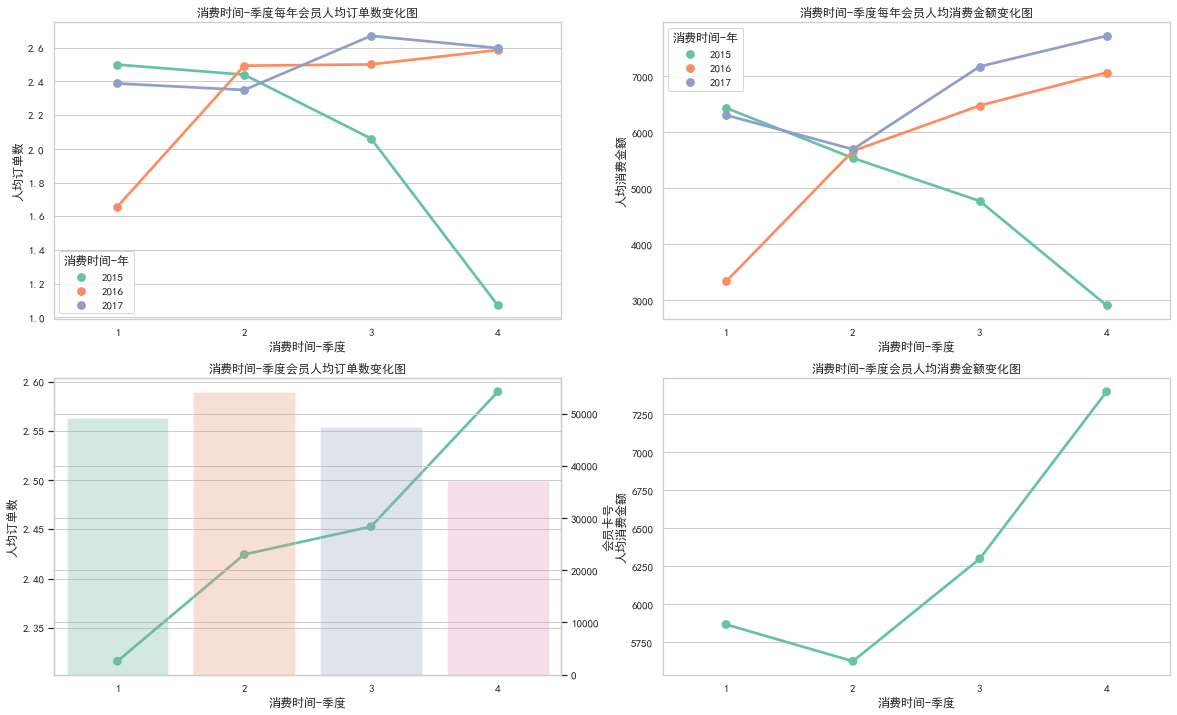

In [248]:
plot_ordertime(customer_consume_df,'消费时间-季度')

* 通过前两幅图可以获得的结论为：
    - 2015年的第4季度和2016年的第1季度无论是在会员的人均订单量或是人均消费金额方面，表现都是最差的。
    - 2017年的数据在会员的人均订单量或是人均消费金额方面表现都是三年中最为稳定的。
* 通过后两幅图可以获得的结论为：
    - 从会员人均订单量的角度上来说，1至4季度呈现出了较为明显的上升趋势，但是上升幅度有限（2.3~2.6），第四季度表现最佳。
    - 从会员人均消费金额的角度上来说，第二季度大概率是受到了退单的影响，导致其人均消费金额相比第一季度略有下降，而人均订单数反而上升。另一个比较有价值的信息室第四季度人均消费额也是全年中最高的，结合人均订单数的情况来说，第四季度在这两方面表现最佳，但同时其消费人次确实四季度中最低的。

月度会员人均订单数与订单金额变化情况：

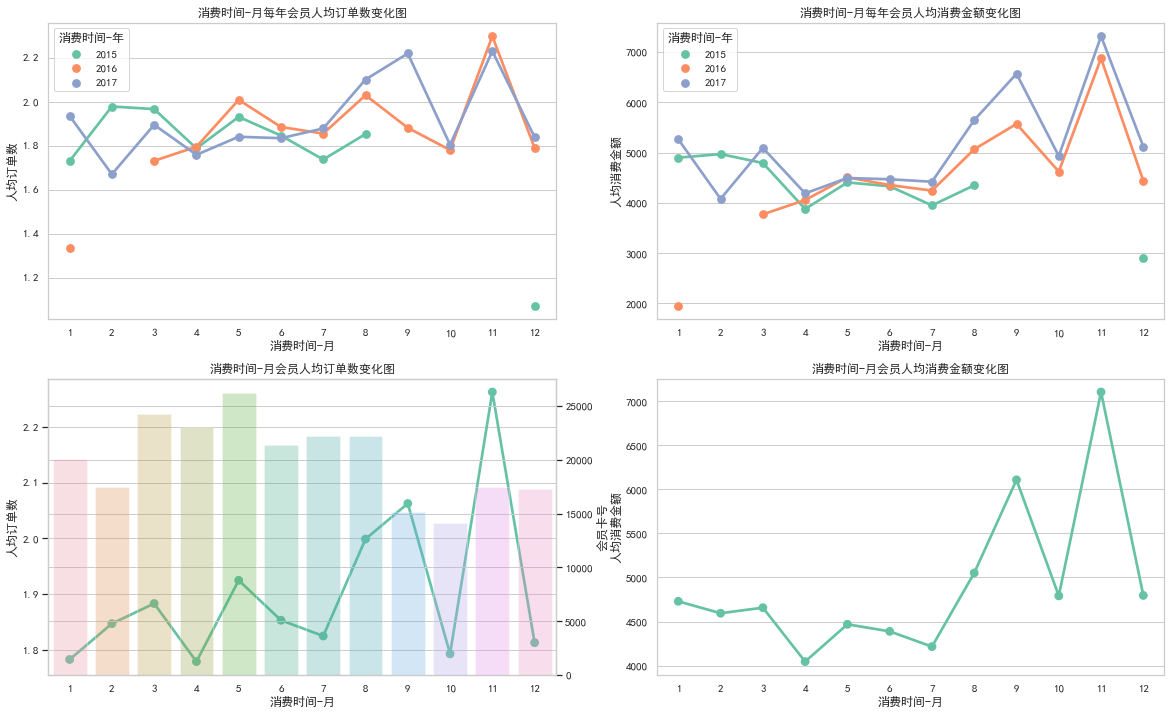

In [249]:
plot_ordertime(customer_consume_df,'消费时间-月')

* 通过前两幅图可以发现：
    - <span class="girk">数据缺失</span>：明显出现缺失的时间段为2015年的9-11月以及2016年的4月。这就解释了为什么在季度板块2015年第3、4季度，2016年的第一季度人均值明显异于其他同类数据，包括不分年度第4季度总人数相比其他季度的人数出现明显下滑的原因。
 * 通过后两幅图可以得到的结论为：
    - <span class="girk">月度人均值受缺失值影响的可能性要小一些，具备一定的代表性</span>。从人均订单数变化的角度来说，前半年普遍表现不佳，8月9月出现了明显增长，10月再次跌落谷底，11月份爆发，12月份回落。结合人均消费金额来说，<span class="girk">全年表现最不佳的无疑是4月份，表现最好的是11月份</span>，这一定程度上反映了会员在月度消费时间上的偏好。

工作日/非工作日会员人均订单数与订单金额变化情况：

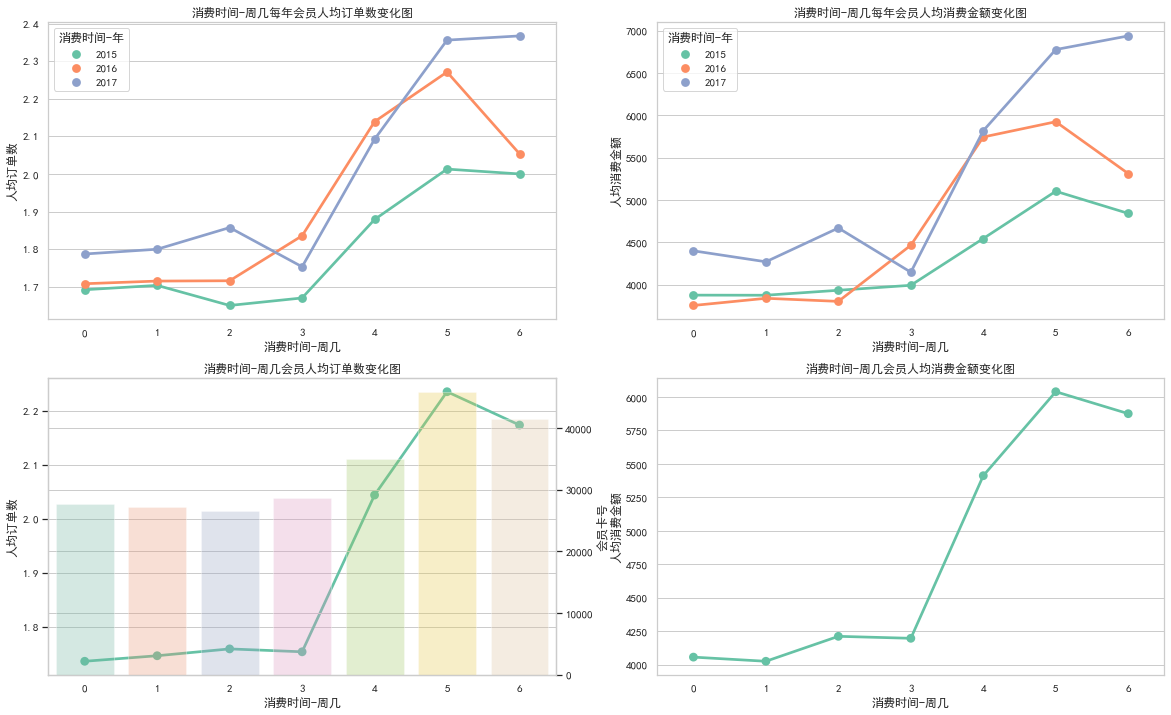

In [250]:
plot_ordertime(customer_consume_df,'消费时间-周几')

* 从整体趋势上来说，周4-周6无论是人均订单数还是人均消费金额都明显高于其余情况，其中周五和周六两天的数据异常的高，说明应该有不少会员在结束了一周的工作之后便通过在百货商场进行消费从而达到放松的目的，符合预期假设。反观周日数据惨淡，严重超出预期，或许是因为第二天是工作日的原因，导致会员在百货商场的消费行为减少。
* 通过对比不同年份周一至周日会员人均订单数和消费金额可以发现，2017年整体数据相比于以往均有提升，反映出百货商场的会员消费的增多。

下单具体时间会员人均订单数与订单金额变化情况：

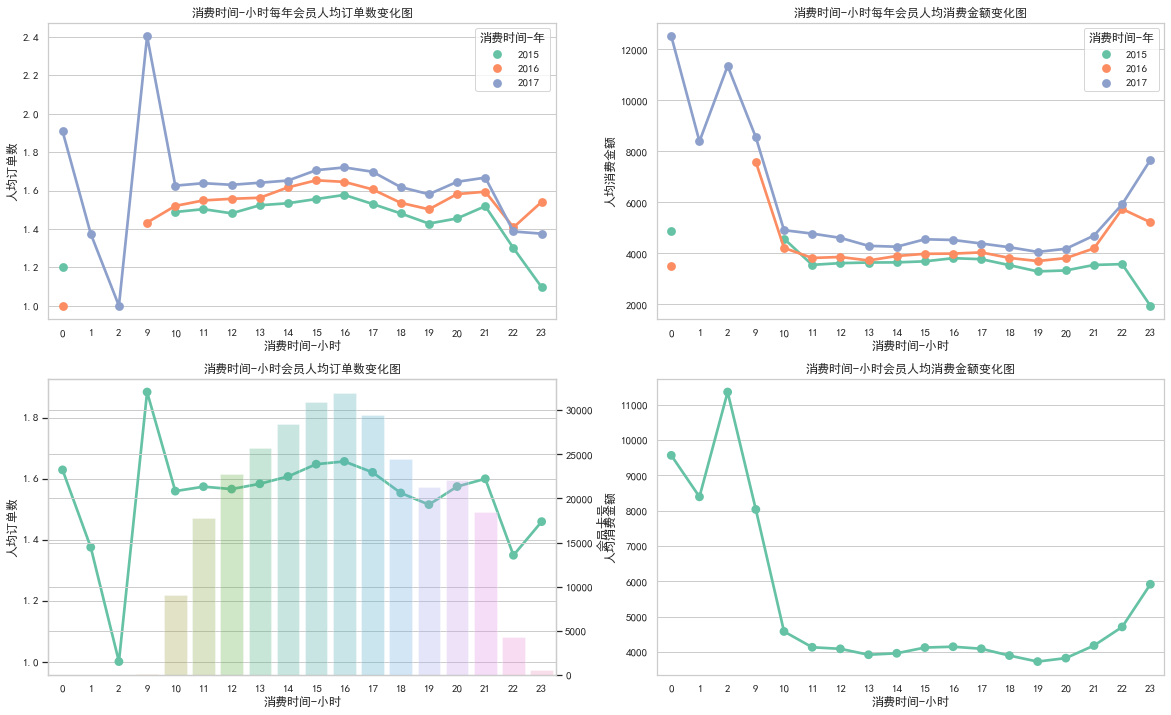

In [251]:
plot_ordertime(customer_consume_df,'消费时间-小时')

* 通过观察第3幅图中体现购买人数的柱状图，可以看到绝大多数的会员都是在11点到21点之间来店消费。再通过其横坐标可检索出百货商场的休息时间为早3点至早9点。
* 由于22点到早9点的订单量极少，所以人均数据层面出现了明显的异常值，在此也就不做具体分析了。

# 数据清洗及预处理

## 选用链表后所有会员卡号非空的数据作为数据集

In [253]:
data_all = data_merged[(pd.isna(data_merged['会员卡号']) == False)&(data_merged['消费时间-年'] != 2018)]
data_all.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870577 entries, 0 to 1888062
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   会员卡号       870577 non-null  object        
 1   消费产生的时间    870577 non-null  datetime64[ns]
 2   商品编码       870577 non-null  object        
 3   销售数量       870577 non-null  int64         
 4   商品售价       870577 non-null  float64       
 5   消费金额       870577 non-null  float64       
 6   商品名称       870577 non-null  object        
 7   此次消费的会员积分  870577 non-null  float64       
 8   收银机号       870577 non-null  int64         
 9   单据号        870577 non-null  object        
 10  柜组编码       870577 non-null  float64       
 11  柜组名称       851233 non-null  object        
 12  出生日期       478535 non-null  datetime64[ns]
 13  性别         491686 non-null  float64       
 14  登记时间       470806 non-null  datetime64[ns]
 15  年龄         478535 non-null  float64       
 16  消费时间-年     870577 n

### 构造特征

#### 最近一次购买距离2018年01月01日的天数

In [272]:
from datetime import datetime,timedelta
target_df = data_all.groupby('会员卡号')['消费产生的时间'].max().reset_index()
now = datetime(2018,1,1)
target_df['距特定时间的天数'] = now - target_df['消费产生的时间']
target_df['距特定时间的天数'] = target_df['距特定时间的天数'].astype('timedelta64[D]')
target_df.rename(columns = {target_df.columns[-1]:'recency'},inplace = True)
target_df

,会员卡号,消费产生的时间,recency
0,000186fa,2017-09-24 12:47:35.986,98.0
1,000234ad,2017-11-01 16:43:04.126,60.0
2,0002adb8,2016-06-30 18:17:23.376,549.0
3,000339f1,2017-12-16 16:02:36.610,15.0
4,0003a4e7,2015-02-12 20:23:07.626,1053.0
...,...,...,...
89075,fffbcb4f,2015-04-18 15:03:20.203,988.0
89076,fffbd0ce,2016-12-05 14:19:46.236,391.0
89077,fffbfb51,2015-05-07 21:30:27.783,969.0
89078,fffc9664,2015-05-08 20:15:47.830,968.0


#### 消费频次

In [273]:
target_df2 = data_all[['会员卡号','消费产生的时间']].value_counts().reset_index()
target_df2 = target_df2.groupby('会员卡号')['消费产生的时间'].count().reset_index()
target_df2.rename(columns = {target_df2.columns[-1]:'frequency'},inplace = True)
target_df2

,会员卡号,frequency
0,000186fa,4
1,000234ad,7
2,0002adb8,2
3,000339f1,10
4,0003a4e7,2
...,...,...
89075,fffbcb4f,1
89076,fffbd0ce,3
89077,fffbfb51,1
89078,fffc9664,1


#### 消费总金额

In [267]:
target_df3 = data_all.groupby('会员卡号')['消费金额'].sum().reset_index()
target_df3.rename(columns = {target_df3.columns[-1]:'monetary_values'},inplace = True)
target_df3                    

,会员卡号,monetary_values
0,000186fa,11880.7
1,000234ad,12850.0
2,0002adb8,7136.0
3,000339f1,6340.8
4,0003a4e7,1219.0
...,...,...
89075,fffbcb4f,1610.0
89076,fffbd0ce,6487.0
89077,fffbfb51,646.0
89078,fffc9664,306.0


#### 平均折扣(只看正单)

In [290]:
data_all['商品总售价'] = data_all['商品售价']*data_all['销售数量']
target_df4 = data_all[data_all['消费金额'] >= 0].groupby('会员卡号')['商品总售价','消费金额'].sum().reset_index()
target_df4['average_discount'] = target_df4['消费金额']/target_df4['商品总售价']
target_df4.drop(['商品总售价','消费金额'],axis = 1,inplace = True)
target_df4

,会员卡号,average_discount
0,000186fa,0.908658
1,000234ad,0.955390
2,0002adb8,1.000000
3,000339f1,0.942870
4,0003a4e7,1.000000
...,...,...
89071,fffbcb4f,1.000000
89072,fffbd0ce,1.000000
89073,fffbfb51,1.000000
89074,fffc9664,0.900000


#### 合并特征

In [288]:
# 在target_df2的基础上添加第一和第三特征
target_df2['recency'] = target_df['recency']
target_df2['monetary_values'] = target_df3['monetary_values']
target_df2

,会员卡号,frequency,recency,monetary_values
0,000186fa,4,98.0,11880.7
1,000234ad,7,60.0,12850.0
2,0002adb8,2,549.0,7136.0
3,000339f1,10,15.0,6340.8
4,0003a4e7,2,1053.0,1219.0
...,...,...,...,...
89075,fffbcb4f,1,988.0,1610.0
89076,fffbd0ce,3,391.0,6487.0
89077,fffbfb51,1,969.0,646.0
89078,fffc9664,1,968.0,306.0


In [291]:
# 将第四特征加入到target_df2中
target_df_concat = pd.merge(target_df2,target_df4,how = 'left',on = '会员卡号')
target_df_concat

,会员卡号,frequency,recency,monetary_values,average_discount
0,000186fa,4,98.0,11880.7,0.908658
1,000234ad,7,60.0,12850.0,0.955390
2,0002adb8,2,549.0,7136.0,1.000000
3,000339f1,10,15.0,6340.8,0.942870
4,0003a4e7,2,1053.0,1219.0,1.000000
...,...,...,...,...,...
89075,fffbcb4f,1,988.0,1610.0,1.000000
89076,fffbd0ce,3,391.0,6487.0,1.000000
89077,fffbfb51,1,969.0,646.0,1.000000
89078,fffc9664,1,968.0,306.0,0.900000


In [294]:
# 用1填补第四特征的缺失值
target_df_concat.fillna(1,inplace = True)

In [297]:
target_df_concat.head()

,会员卡号,frequency,recency,monetary_values,average_discount
0,000186fa,4,98.0,11880.7,0.908658
1,000234ad,7,60.0,12850.0,0.955390
2,0002adb8,2,549.0,7136.0,1.000000
3,000339f1,10,15.0,6340.8,0.942870
4,0003a4e7,2,1053.0,1219.0,1.000000


### 数据预处理

In [327]:
def log_plot_distribution(df,colname,extra = 0,figsize = (12,6)):
    plt.figure(figsize = figsize)
    
    plt.subplot(121)
    sns.histplot(df[colname] + extra,bins = 100)
    plt.title(colname+u' 原始数据分布')
    
    plt.subplot(122)
    sns.histplot(np.log(df[colname] + extra),bins = 100,kde=True)
    plt.title(colname+u' log化后数据分布')
    
    plt.show()

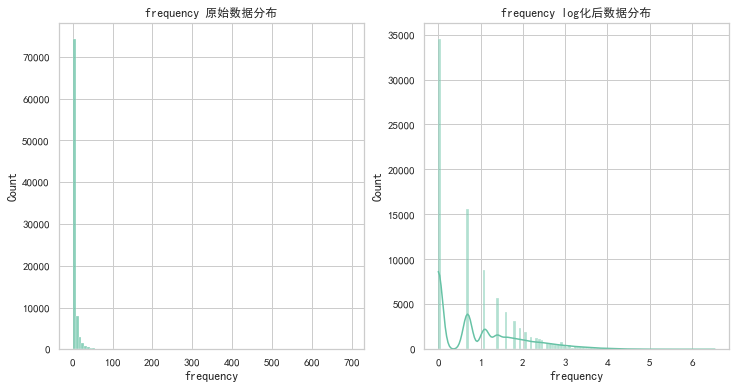

In [325]:
log_plot_distribution(target_df_concat,'frequency')

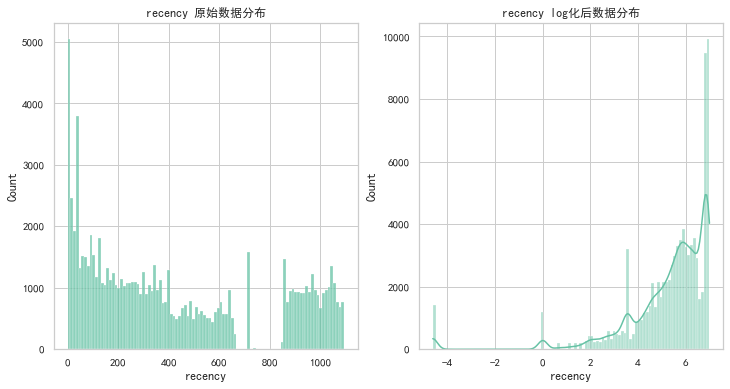

In [331]:
# 由于recency特征中存在为0的值，故该特征所有值均需要增加0.01，从而避免负无穷大出现
log_plot_distribution(target_df_concat,'recency',extra = 0.01)

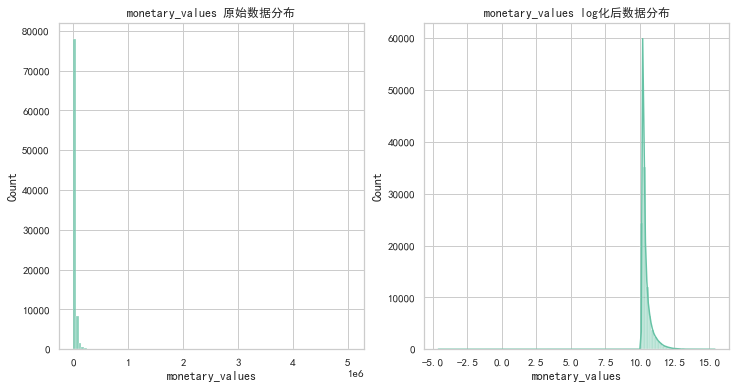

In [337]:
# 由于recency特征中存在为负值，故该特征所有值均需要增加该特征最小值的绝对值后再增加0.01，从而避免空值和负无穷大值出现
log_plot_distribution(target_df_concat,'monetary_values',extra = -target_df_concat.monetary_values.min() + 0.01)

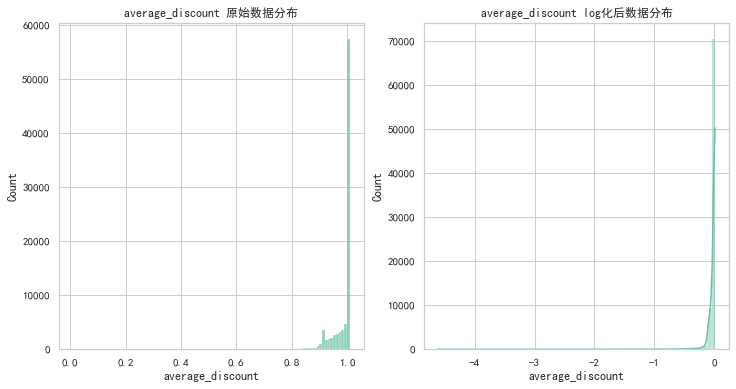

In [333]:
# 由于average_discount特征中存在为0的值，故该特征所有值均需要增加0.01，从而避免负无穷大出现
log_plot_distribution(target_df_concat,'average_discount',extra = 0.01)

<span class="girk">前三个特征</span>在对数化后，取值范围明显被缩小，故可采用<span class="girk">对数化的方式缩小差异性</span>。<span class="girk">最后一个特征average_discount则并不适用</span>。

#### log化特征向量

In [345]:
target_df_concat['frequency_log'] = np.log(target_df_concat.frequency)
target_df_concat['recency_log'] = np.log(target_df_concat.recency+0.01)
target_df_concat['monetary_values_log'] = np.log(target_df_concat.monetary_values - target_df_concat.monetary_values.min() + 0.01 )

In [346]:
target_df_concat

,会员卡号,frequency,recency,monetary_values,average_discount,frequency_log,recency_log,monetary_values_log
0,000186fa,4,98.0,11880.7,0.908658,1.386294,4.585070,10.541944
1,000234ad,7,60.0,12850.0,0.955390,1.945910,4.094511,10.567216
2,0002adb8,2,549.0,7136.0,1.000000,0.693147,6.308117,10.408086
3,000339f1,10,15.0,6340.8,0.942870,2.302585,2.708717,10.383788
4,0003a4e7,2,1053.0,1219.0,1.000000,0.693147,6.959408,10.211318
...,...,...,...,...,...,...,...,...
89075,fffbcb4f,1,988.0,1610.0,1.000000,0.000000,6.895693,10.225586
89076,fffbd0ce,3,391.0,6487.0,1.000000,1.098612,5.968733,10.388300
89077,fffbfb51,1,969.0,646.0,1.000000,0.000000,6.876275,10.190034
89078,fffc9664,1,968.0,306.0,0.900000,0.000000,6.875242,10.177188


In [348]:
X = target_df_concat.iloc[:,-4:]
X

,average_discount,frequency_log,recency_log,monetary_values_log
0,0.908658,1.386294,4.585070,10.541944
1,0.955390,1.945910,4.094511,10.567216
2,1.000000,0.693147,6.308117,10.408086
3,0.942870,2.302585,2.708717,10.383788
4,1.000000,0.693147,6.959408,10.211318
...,...,...,...,...
89075,1.000000,0.000000,6.895693,10.225586
89076,1.000000,1.098612,5.968733,10.388300
89077,1.000000,0.000000,6.876275,10.190034
89078,0.900000,0.000000,6.875242,10.177188


#### 标准化

In [349]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)

StandardScaler()

In [351]:
X = pd.DataFrame(ss.transform(X),columns = X.columns)
X.head()

,average_discount,frequency_log,recency_log,monetary_values_log
0,-0.645859,0.415297,-0.372131,0.222502
1,-0.136540,0.964385,-0.629851,0.286415
2,0.349642,-0.264809,0.533091,-0.116017
3,-0.272995,1.314349,-1.357894,-0.177465
4,0.349642,-0.264809,0.875254,-0.613632


## 选用链表后非空会员卡号在会员表中的数据作为数据集

In [382]:
data_not_all = target_df_concat[target_df_concat['会员卡号'].isin(data_customer['会员卡号'])]
data_not_all.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47230 entries, 0 to 89078
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   会员卡号                 47230 non-null  object 
 1   frequency            47230 non-null  int64  
 2   recency              47230 non-null  float64
 3   monetary_values      47230 non-null  float64
 4   average_discount     47230 non-null  float64
 5   frequency_log        47230 non-null  float64
 6   recency_log          47230 non-null  float64
 7   monetary_values_log  47230 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.2+ MB


In [383]:
data_not_all = pd.merge(data_not_all,data_customer,how = 'left',on = '会员卡号')
data_not_all.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47230 entries, 0 to 47229
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   会员卡号                 47230 non-null  object        
 1   frequency            47230 non-null  int64         
 2   recency              47230 non-null  float64       
 3   monetary_values      47230 non-null  float64       
 4   average_discount     47230 non-null  float64       
 5   frequency_log        47230 non-null  float64       
 6   recency_log          47230 non-null  float64       
 7   monetary_values_log  47230 non-null  float64       
 8   出生日期                 42455 non-null  datetime64[ns]
 9   性别                   46192 non-null  float64       
 10  登记时间                 44937 non-null  datetime64[ns]
 11  年龄                   42455 non-null  float64       
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 4.7+ MB


### 构造特征

在4.1已构造特征的基础上增加年龄和登记时间两个特征。

#### 登记时间

登记时间存在空值，故删除登记时间为空的会员特征信息。

In [384]:
data_not_all.dropna(subset='登记时间',how='any',axis=0,inplace=True)
data_not_all.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44937 entries, 0 to 47229
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   会员卡号                 44937 non-null  object        
 1   frequency            44937 non-null  int64         
 2   recency              44937 non-null  float64       
 3   monetary_values      44937 non-null  float64       
 4   average_discount     44937 non-null  float64       
 5   frequency_log        44937 non-null  float64       
 6   recency_log          44937 non-null  float64       
 7   monetary_values_log  44937 non-null  float64       
 8   出生日期                 40980 non-null  datetime64[ns]
 9   性别                   44713 non-null  float64       
 10  登记时间                 44937 non-null  datetime64[ns]
 11  年龄                   40980 non-null  float64       
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 4.5+ MB


查看是否存在异常值。

In [385]:
data_not_all['登记时间'].describe()

count                          44937
unique                         18030
top              2016-10-27 00:00:00
freq                             139
first     2002-10-23 21:10:35.260000
last             2018-01-03 00:00:00
Name: 登记时间, dtype: object

计算等级时间距离2018年01月01日的天数。

In [386]:
from datetime import datetime,timedelta
now = datetime(2018,1,1)
data_not_all['登记时间距离特定日期的天数'] = now - data_not_all['登记时间']
data_not_all['登记时间距离特定日期的天数'] = data_not_all['登记时间距离特定日期的天数'].astype('timedelta64[D]')
data_not_all['登记时间距离特定日期的天数'] = data_not_all['登记时间距离特定日期的天数'].apply(lambda x: 0 if x < 0 else x)
data_not_all.rename(columns = {data_not_all.columns[-1]:'join_days'},inplace = True)
data_not_all

,会员卡号,frequency,recency,monetary_values,average_discount,frequency_log,recency_log,monetary_values_log,出生日期,性别,登记时间,年龄,join_days
0,000186fa,4,98.0,11880.7,0.908658,1.386294,4.585070,10.541944,1977-08-04,0.0,2016-01-16 00:00:00.000,40.0,716.0
1,000234ad,7,60.0,12850.0,0.955390,1.945910,4.094511,10.567216,1975-08-06,0.0,2009-03-19 00:00:00.000,42.0,3210.0
2,000339f1,10,15.0,6340.8,0.942870,2.302585,2.708717,10.383788,1988-02-26,0.0,2013-09-17 00:00:00.000,29.0,1567.0
3,0004bad2,1,66.0,8964.0,1.000000,0.000000,4.189806,10.461800,1984-09-20,0.0,2013-05-27 00:00:00.000,33.0,1680.0
4,000539ab,1,60.0,236.0,1.000000,0.000000,4.094511,10.174522,1753-01-01,0.0,2016-07-05 13:17:19.800,265.0,544.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47224,fff78bed,2,657.0,6576.0,1.000000,0.693147,6.487699,10.391037,1974-05-19,0.0,2005-06-14 17:07:35.603,43.0,4583.0
47225,fff79973,2,861.0,2547.0,0.900000,0.693147,6.758106,10.258971,1979-10-11,0.0,2009-02-28 00:00:00.000,38.0,3229.0
47226,fffa7c0b,12,346.0,11712.0,1.000000,2.484907,5.846468,10.537479,1969-11-22,0.0,2011-05-11 00:00:00.000,48.0,2427.0
47228,fffbd0ce,3,391.0,6487.0,1.000000,1.098612,5.968733,10.388300,1975-09-04,0.0,2015-04-15 00:00:00.000,42.0,992.0


In [387]:
data_not_all.join_days.describe()

count    44937.000000
mean      1296.066916
std       1156.962808
min          0.000000
25%        348.000000
50%        962.000000
75%       2019.000000
max       5548.000000
Name: join_days, dtype: float64

#### 年龄

查看是否存在异常值。

In [388]:
data_not_all['年龄'].describe()

count    40980.000000
mean        91.471986
std         94.885332
min          0.000000
25%         34.000000
50%         44.000000
75%         60.000000
max        265.000000
Name: 年龄, dtype: float64

年龄特征存在异常值，我将选取年龄区间为[10,85]的会员作为数据集。

In [390]:
data_not_all = data_not_all[(data_not_all['年龄'] >= 10) & (data_not_all['年龄'] <= 85)]
data_not_all.rename(columns = {'年龄':'old'},inplace = True)
data_not_all

,会员卡号,frequency,recency,monetary_values,average_discount,frequency_log,recency_log,monetary_values_log,出生日期,性别,登记时间,old,join_days
0,000186fa,4,98.0,11880.7,0.908658,1.386294,4.585070,10.541944,1977-08-04,0.0,2016-01-16 00:00:00.000,40.0,716.0
1,000234ad,7,60.0,12850.0,0.955390,1.945910,4.094511,10.567216,1975-08-06,0.0,2009-03-19 00:00:00.000,42.0,3210.0
2,000339f1,10,15.0,6340.8,0.942870,2.302585,2.708717,10.383788,1988-02-26,0.0,2013-09-17 00:00:00.000,29.0,1567.0
3,0004bad2,1,66.0,8964.0,1.000000,0.000000,4.189806,10.461800,1984-09-20,0.0,2013-05-27 00:00:00.000,33.0,1680.0
7,000cd735,51,36.0,123759.5,0.915564,3.931826,3.583797,11.916722,1963-10-09,1.0,2013-06-02 00:00:00.000,54.0,1674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47224,fff78bed,2,657.0,6576.0,1.000000,0.693147,6.487699,10.391037,1974-05-19,0.0,2005-06-14 17:07:35.603,43.0,4583.0
47225,fff79973,2,861.0,2547.0,0.900000,0.693147,6.758106,10.258971,1979-10-11,0.0,2009-02-28 00:00:00.000,38.0,3229.0
47226,fffa7c0b,12,346.0,11712.0,1.000000,2.484907,5.846468,10.537479,1969-11-22,0.0,2011-05-11 00:00:00.000,48.0,2427.0
47228,fffbd0ce,3,391.0,6487.0,1.000000,1.098612,5.968733,10.388300,1975-09-04,0.0,2015-04-15 00:00:00.000,42.0,992.0


#### 合并特征

In [393]:
data_not_all.drop(columns=['出生日期','性别','登记时间'],axis = 1,inplace = True)
data_not_all

,会员卡号,frequency,recency,monetary_values,average_discount,frequency_log,recency_log,monetary_values_log,old,join_days
0,000186fa,4,98.0,11880.7,0.908658,1.386294,4.585070,10.541944,40.0,716.0
1,000234ad,7,60.0,12850.0,0.955390,1.945910,4.094511,10.567216,42.0,3210.0
2,000339f1,10,15.0,6340.8,0.942870,2.302585,2.708717,10.383788,29.0,1567.0
3,0004bad2,1,66.0,8964.0,1.000000,0.000000,4.189806,10.461800,33.0,1680.0
7,000cd735,51,36.0,123759.5,0.915564,3.931826,3.583797,11.916722,54.0,1674.0
...,...,...,...,...,...,...,...,...,...,...
47224,fff78bed,2,657.0,6576.0,1.000000,0.693147,6.487699,10.391037,43.0,4583.0
47225,fff79973,2,861.0,2547.0,0.900000,0.693147,6.758106,10.258971,38.0,3229.0
47226,fffa7c0b,12,346.0,11712.0,1.000000,2.484907,5.846468,10.537479,48.0,2427.0
47228,fffbd0ce,3,391.0,6487.0,1.000000,1.098612,5.968733,10.388300,42.0,992.0


### 数据预处理

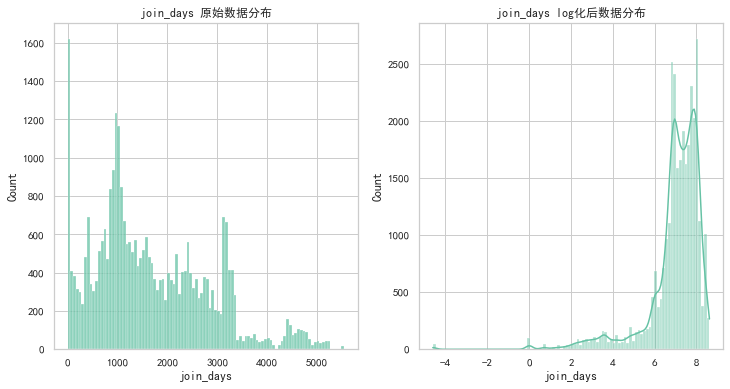

In [391]:
log_plot_distribution(data_not_all,'join_days',extra = 0.01)

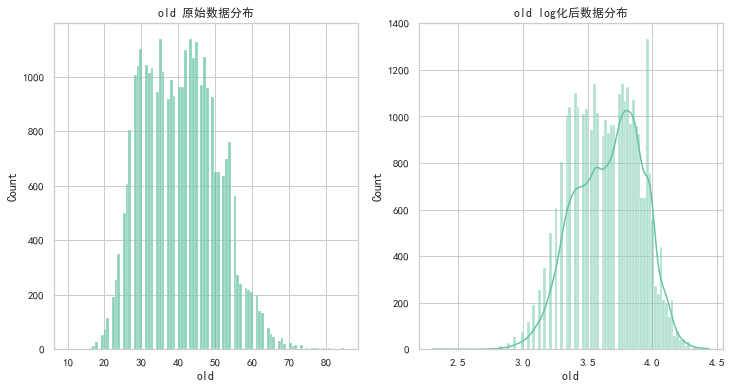

In [392]:
log_plot_distribution(data_not_all,'old')

#### log化特征向量

In [394]:
data_not_all['join_days_log'] = np.log(data_not_all.join_days + 0.01)
data_not_all['old_log'] = np.log(data_not_all.old)
data_not_all.head()

,会员卡号,frequency,recency,monetary_values,average_discount,frequency_log,recency_log,monetary_values_log,old,join_days,join_days_log,old_log
0,000186fa,4,98.0,11880.7,0.908658,1.386294,4.585070,10.541944,40.0,716.0,6.573694,3.688879
1,000234ad,7,60.0,12850.0,0.955390,1.945910,4.094511,10.567216,42.0,3210.0,8.074029,3.737670
2,000339f1,10,15.0,6340.8,0.942870,2.302585,2.708717,10.383788,29.0,1567.0,7.356925,3.367296
3,0004bad2,1,66.0,8964.0,1.000000,0.000000,4.189806,10.461800,33.0,1680.0,7.426555,3.496508
7,000cd735,51,36.0,123759.5,0.915564,3.931826,3.583797,11.916722,54.0,1674.0,7.422977,3.988984


In [395]:
X2 = pd.concat([data_not_all.iloc[:,4:8],data_not_all.iloc[:,-2:]],axis = 1)
X2

,average_discount,frequency_log,recency_log,monetary_values_log,join_days_log,old_log
0,0.908658,1.386294,4.585070,10.541944,6.573694,3.688879
1,0.955390,1.945910,4.094511,10.567216,8.074029,3.737670
2,0.942870,2.302585,2.708717,10.383788,7.356925,3.367296
3,1.000000,0.000000,4.189806,10.461800,7.426555,3.496508
7,0.915564,3.931826,3.583797,11.916722,7.422977,3.988984
...,...,...,...,...,...,...
47224,1.000000,0.693147,6.487699,10.391037,8.430111,3.761200
47225,0.900000,0.693147,6.758106,10.258971,8.079931,3.637586
47226,1.000000,2.484907,5.846468,10.537479,7.794415,3.871201
47228,1.000000,1.098612,5.968733,10.388300,6.899733,3.737670


#### 标准化

In [396]:
from sklearn.preprocessing import StandardScaler
ss2 = StandardScaler()
ss2.fit(X2)

StandardScaler()

In [397]:
X2 = pd.DataFrame(ss2.transform(X2),columns = X2.columns)
X2

,average_discount,frequency_log,recency_log,monetary_values_log,join_days_log,old_log
0,-0.495563,0.186719,-0.215715,0.034923,-0.298145,0.091937
1,-0.038302,0.689815,-0.434866,0.088812,0.807251,0.282116
2,-0.160810,1.010466,-1.053952,-0.302308,0.278913,-1.161561
3,0.398187,-1.059562,-0.392294,-0.135966,0.330214,-0.657908
4,-0.427990,2.475157,-0.663021,2.966329,0.327578,1.261713
...,...,...,...,...,...,...
31388,0.398187,-0.436421,0.634261,-0.286852,1.069600,0.373835
31389,-0.580276,-0.436421,0.755062,-0.568452,0.811599,-0.107999
31390,0.398187,1.174374,0.347799,0.025404,0.601241,0.802607
31391,0.398187,-0.071907,0.402420,-0.292688,-0.057930,0.282116


# 训练模型

## 基于所有会员卡号非空的数据集

### 聚类轮廓系数

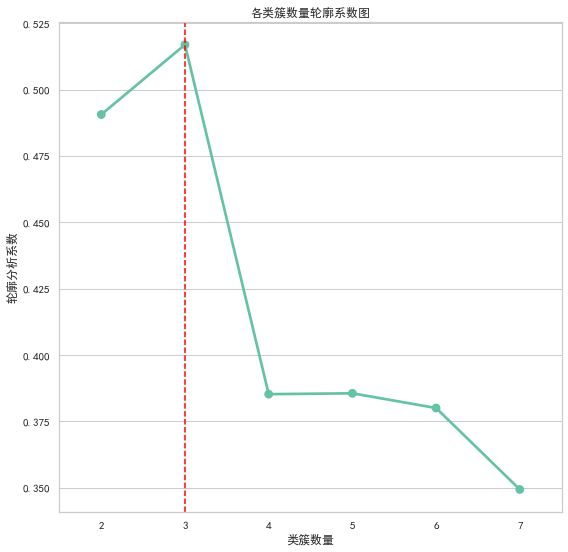

In [419]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_cluster = range(2,8)
scores = []
clf_estimator_list = []
for i in range(len(n_cluster)):
    kmeans = KMeans(n_clusters = n_cluster[i],random_state=42,algorithm='elkan')
    kmeans.fit(X.values)
    clf_estimator_list.append(kmeans)
    scores.append(silhouette_score(X,kmeans.labels_))
max_index = scores.index(max(scores))
plt.figure(figsize = (9,9))
sns.pointplot(x = list(n_cluster),
             y = scores)
plt.axvline(max_index,linestyle = '--',c = 'red')
plt.xlabel(u'类簇数量')
plt.ylabel(u'轮廓分析系数')
plt.title(u'各类簇数量轮廓系数图')
plt.show()

### 聚类结果可视化（雷达图）

In [454]:
# 单个聚类雷达图的绘图函数
def plot_radar_map(df,clf):
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111,polar = True)
    
    theta = np.linspace(0,2*np.pi,df.shape[1],endpoint=False)
    ax.set_thetagrids(theta * 180 / np.pi, df.columns)
    theta = np.concatenate((theta,[theta[0]]))
    
    centers = clf.cluster_centers_
    n_cluster = str(len(centers))
    for i in range(len(centers)):
        ax.plot(theta,np.append(centers[i],centers[i][0]),'-o',label = '类别' + str(i + 1))
        ax.fill(theta,np.append(centers[i],centers[i][0]),alpha = 0.25)
    ax.set_title('n_clusters = '+ n_cluster + u' 聚类雷达图')
    ax.legend()
    plt.show()

根据轮廓系数的结果对比一下分成2类和3类的聚类中心可视化图。

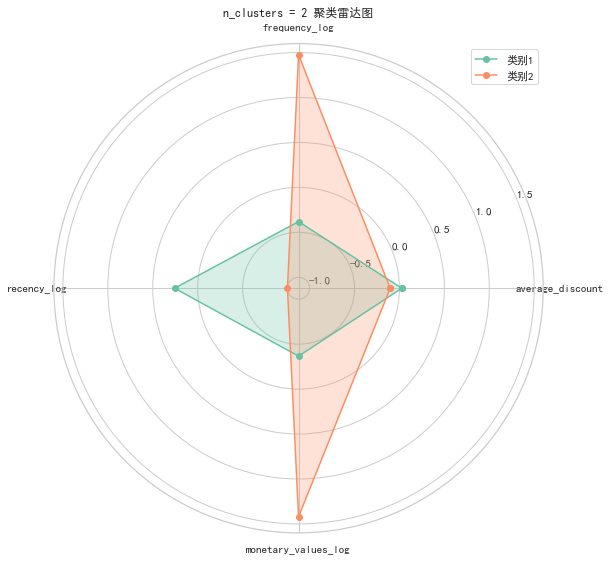

In [455]:
# 聚类为2类的情况
plot_radar_map(X,clf_estimator_list[0])

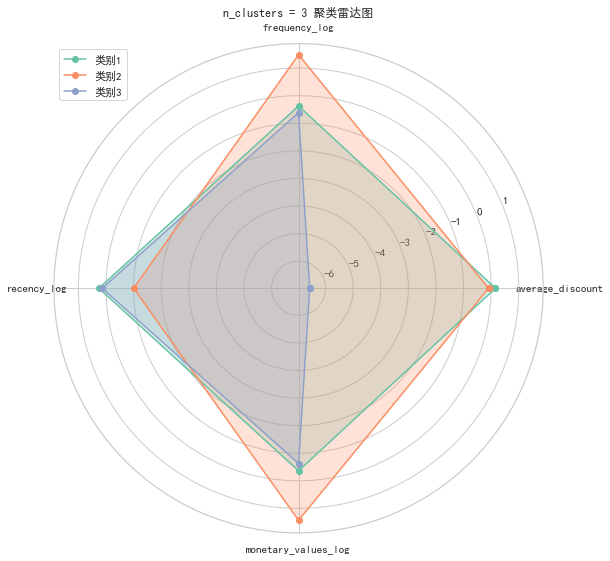

In [456]:
# 聚类为3类的情况
plot_radar_map(X,clf_estimator_list[1])

通过对比上两张图可以看出：
* 聚类为2类时，特征差别较为明显。即类别1在四个特征维度方面表现较均衡；类别2可直接定义为价值较高的会员客群。
* 聚类为3类时，相比于聚类为2类的情况，细分出了一类对于折扣反应异常敏感的会员客群，这一新增分类在未来的业务实践中很可能将直接提升销售业绩。

### 聚类分析

在原数据集上增加n_clusters = 2和n_clusters = 3的类别标签。

In [459]:
X['n_clusters_2'] = clf_estimator_list[0].labels_
X['n_clusters_3'] = clf_estimator_list[1].labels_
X

,average_discount,frequency_log,recency_log,monetary_values_log,n_clusters_2,n_clusters_3
0,-0.645859,0.415297,-0.372131,0.222502,0,0
1,-0.136540,0.964385,-0.629851,0.286415,1,1
2,0.349642,-0.264809,0.533091,-0.116017,0,0
3,-0.272995,1.314349,-1.357894,-0.177465,1,1
4,0.349642,-0.264809,0.875254,-0.613632,0,0
...,...,...,...,...,...,...
89075,0.349642,-0.944916,0.841781,-0.577550,0,0
89076,0.349642,0.133028,0.354792,-0.166055,0,0
89077,0.349642,-0.944916,0.831579,-0.667458,0,0
89078,-0.740216,-0.944916,0.831037,-0.699946,0,0


#### n_clusters = 2

每一类各包含人数：

In [519]:
X['n_clusters_2'].value_counts()

0    70848
1    18232
Name: n_clusters_2, dtype: int64

每一类中心点在各维度上对应的值：

In [520]:
cluster_2_centers = ss.inverse_transform(clf_estimator_list[0].cluster_centers_)
cluster_2_centers[:,1:] = np.exp(cluster_2_centers[:,1:])
cluster_2_centers[:,2] = cluster_2_centers[:,2] - 0.01
cluster_2_centers[:,3] = cluster_2_centers[:,3] + target_df_concat.monetary_values.min() - 0.01

In [521]:
df = pd.DataFrame(cluster_2_centers,columns = ['average_discount','frequency','recency','monetary_values'])
df

,average_discount,frequency,recency,monetary_values
0,0.970356,1.776975,324.998403,4010.076216
1,0.958472,11.790532,29.731639,34844.449882


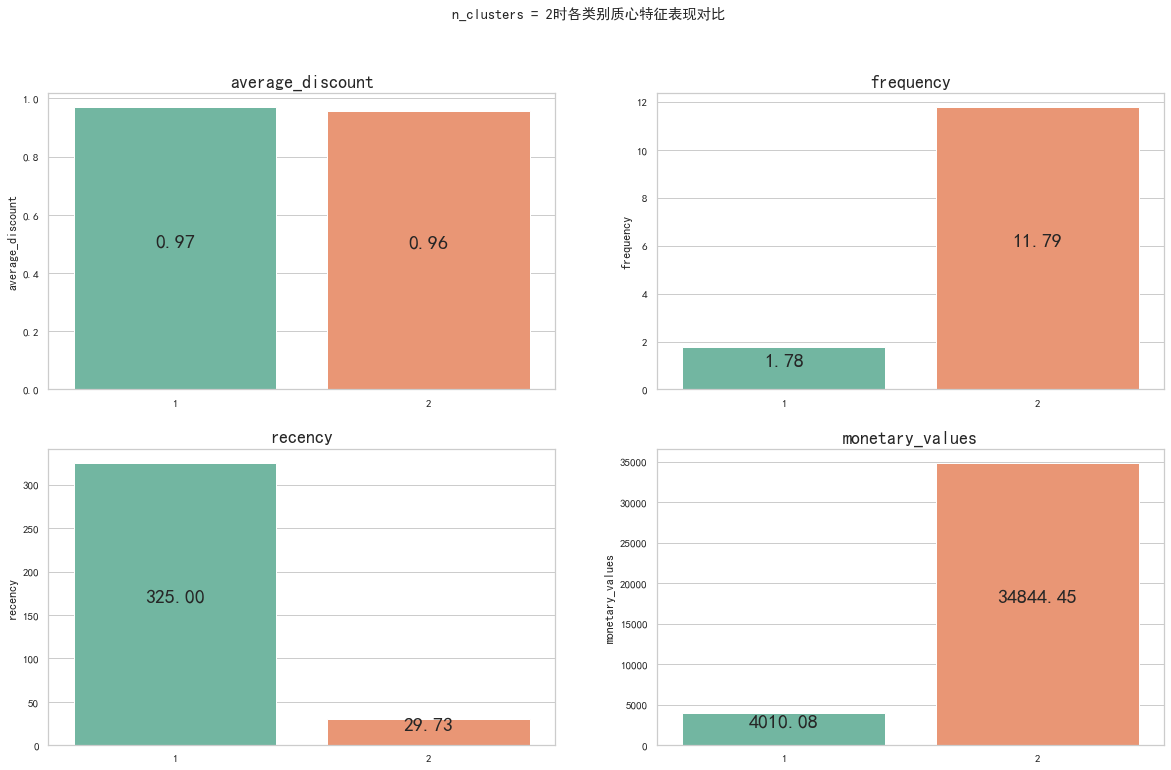

In [524]:
plt.figure(figsize = (20,12))
plt.subplot(221)
sns.barplot(data = df,
           x = df.index+1,
           y = 'average_discount')
for i in range(len(df.average_discount)):
    plt.text(x = i,
             y = df.average_discount[i]/2,
             s = '%.2f' % df.average_discount[i],
             ha = 'center',
             va = 'bottom',
             fontsize = 20)
plt.title(u'average_discount',fontsize = 18)
plt.subplot(222)
sns.barplot(data = df,
           x = df.index+1,
           y = 'frequency')
for i in range(len(df.frequency)):
    plt.text(x = i,
             y = df.frequency[i]/2,
             s = '%.2f' % df.frequency[i],
             ha = 'center',
             va = 'bottom',
             fontsize = 20)
plt.title(u'frequency',fontsize = 18)
plt.subplot(223)
sns.barplot(data = df,
           x = df.index+1,
           y = 'recency')
for i in range(len(df.recency)):
    plt.text(x = i,
             y = df.recency[i]/2,
             s = '%.2f' % df.recency[i],
             ha = 'center',
             va = 'bottom',
             fontsize = 20)
plt.title(u'recency',fontsize = 18)
plt.subplot(224)
sns.barplot(data = df,
           x = df.index+1,
           y = 'monetary_values')
for i in range(len(df.monetary_values)):
    plt.text(x = i,
             y = df.monetary_values[i]/2,
             s = '%.2f' % df.monetary_values[i],
             ha = 'center',
             va = 'bottom',
             fontsize = 20)
plt.title(u'monetary_values',fontsize = 18)
plt.suptitle(u'n_clusters = 2时各类别质心特征表现对比')
plt.show()

**相比于类别1，类别2的客户普遍的特征为消费频次(frequency)更高,最后一次消费时间(rencency)更近，消费总金额(monetary_values)更高。**于是<span class="girk">类别2</span>的客户可定义为<span class="girk">重要价值客户</span>，<span class="girk">类别1</span>则可定义为<span class="girk">一般客户</span>。

#### n_clusters = 3

每一类各包含人数：

In [525]:
X.n_clusters_3.value_counts()

0    69605
1    18065
2     1410
Name: n_clusters_3, dtype: int64

每一类中心点在各维度上对应的值：

In [526]:
cluster_3_centers = ss.inverse_transform(clf_estimator_list[1].cluster_centers_)
cluster_3_centers[:,1:] = np.exp(cluster_3_centers[:,1:])
cluster_3_centers[:,2] = cluster_3_centers[:,2] - 0.01
cluster_3_centers[:,3] = cluster_3_centers[:,3] + target_df_concat.monetary_values.min() - 0.01

In [527]:
df = pd.DataFrame(cluster_3_centers,columns = ['average_discount','frequency','recency','monetary_values'])
df

,average_discount,frequency,recency,monetary_values
0,0.982429,1.791465,324.708821,4097.083361
1,0.959230,11.898104,29.548201,35148.968550
2,0.364186,1.399341,258.913157,1076.003704


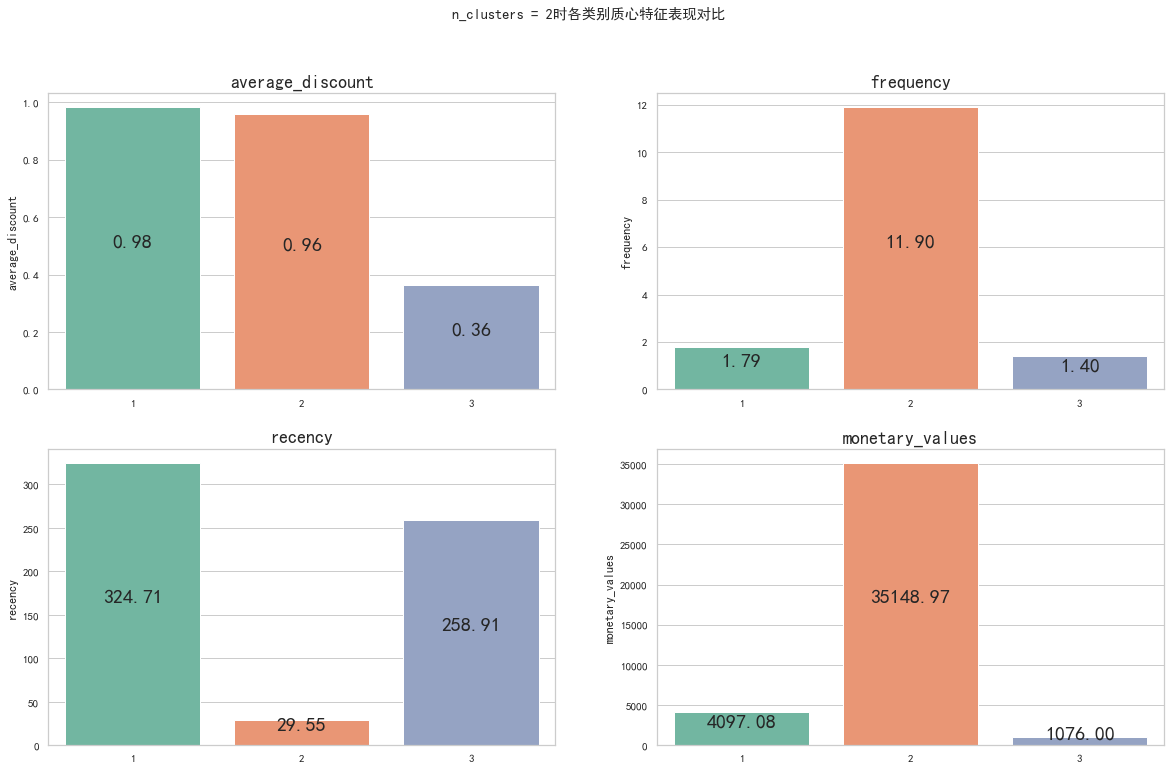

In [528]:
plt.figure(figsize = (20,12))
plt.subplot(221)
sns.barplot(data = df,
           x = df.index+1,
           y = 'average_discount')
for i in range(len(df.average_discount)):
    plt.text(x = i,
             y = df.average_discount[i]/2,
             s = '%.2f' % df.average_discount[i],
             ha = 'center',
             va = 'bottom',
             fontsize = 20)
plt.title(u'average_discount',fontsize = 18)
plt.subplot(222)
sns.barplot(data = df,
           x = df.index+1,
           y = 'frequency')
for i in range(len(df.frequency)):
    plt.text(x = i,
             y = df.frequency[i]/2,
             s = '%.2f' % df.frequency[i],
             ha = 'center',
             va = 'bottom',
             fontsize = 20)
plt.title(u'frequency',fontsize = 18)
plt.subplot(223)
sns.barplot(data = df,
           x = df.index+1,
           y = 'recency')
for i in range(len(df.recency)):
    plt.text(x = i,
             y = df.recency[i]/2,
             s = '%.2f' % df.recency[i],
             ha = 'center',
             va = 'bottom',
             fontsize = 20)
plt.title(u'recency',fontsize = 18)
plt.subplot(224)
sns.barplot(data = df,
           x = df.index+1,
           y = 'monetary_values')
for i in range(len(df.monetary_values)):
    plt.text(x = i,
             y = df.monetary_values[i]/2,
             s = '%.2f' % df.monetary_values[i],
             ha = 'center',
             va = 'bottom',
             fontsize = 20)
plt.title(u'monetary_values',fontsize = 18)
plt.suptitle(u'n_clusters = 3时各类别质心特征表现对比')
plt.show()

跟之前在聚类结果可视化模块的结论类似，相比于分为2类的情况，增加的第三类主要基于一般客户进行了细分，细分出的这一部分客户体现出其对商品折扣的敏感性。于是对应三类客户的标签分别可定义为：
* <span class="girk">类别1 - 一般价值客户</span>
* <span class="girk">类别2 - 重要价值客户</span>
* <span class="girk">类别3 - 一般价值折扣敏感型客户</span>

## 基于链表后非空会员卡号在会员表中的数据集

### 聚类轮廓系数

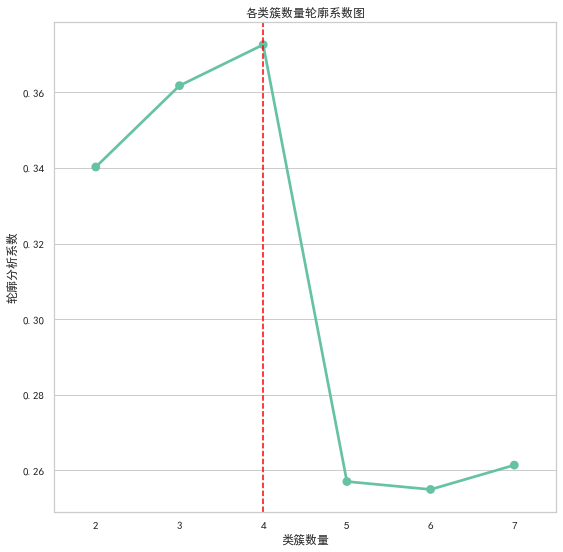

In [529]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_cluster = range(2,8)
scores = []
clf_estimator_list = []
for i in range(len(n_cluster)):
    kmeans = KMeans(n_clusters = n_cluster[i],random_state=42,algorithm='elkan')
    kmeans.fit(X2.values)
    clf_estimator_list.append(kmeans)
    scores.append(silhouette_score(X2,kmeans.labels_))
max_index = scores.index(max(scores))
plt.figure(figsize = (9,9))
sns.pointplot(x = list(n_cluster),
             y = scores)
plt.axvline(max_index,linestyle = '--',c = 'red')
plt.xlabel(u'类簇数量')
plt.ylabel(u'轮廓分析系数')
plt.title(u'各类簇数量轮廓系数图')
plt.show()

### 聚类结果可视化（雷达图）

根据轮廓系数的结果对比一下分成2类和3类的聚类中心可视化图。

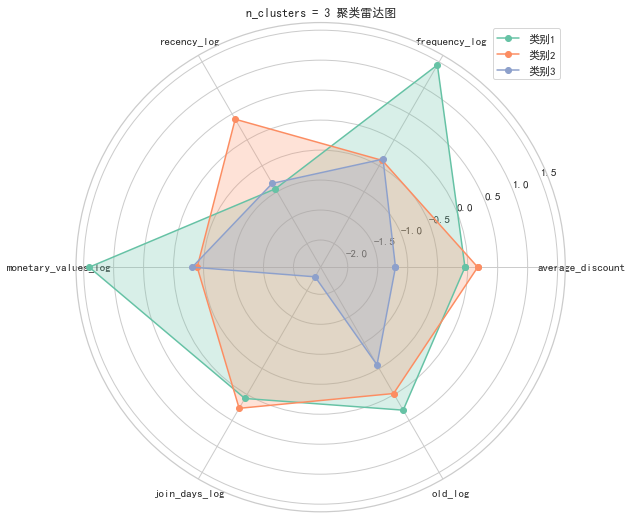

In [530]:
# 聚类为3类的情况
plot_radar_map(X2,clf_estimator_list[1])

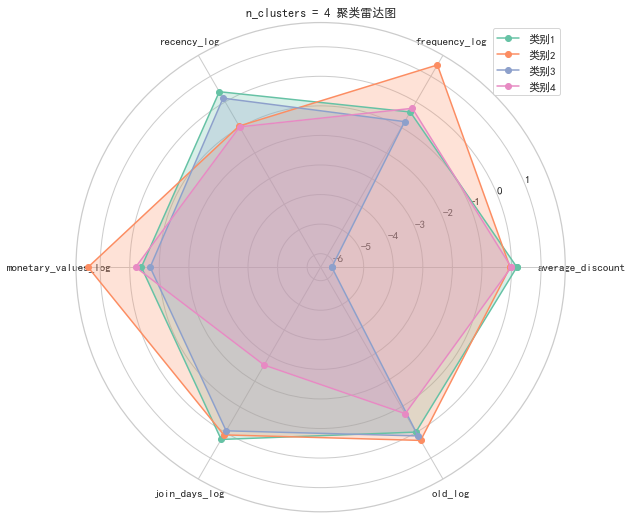

In [532]:
# 聚类为4类的情况
plot_radar_map(X2,clf_estimator_list[2])

通过对比上两张图可以发现：
* 在聚类为三类的情况下，第三类相较于其余类别在入会时间特征层面上明显更晚。
* 在聚类为死累的情况下，相当于在三类的基础上增加了折扣敏感型人群的分类细化。

### 聚类分析

在原数据集上增加n_clusters = 4的类别标签。

In [534]:
X2['n_clusters_4'] = clf_estimator_list[2].labels_

每一类各包含人数：

In [535]:
X2.n_clusters_4.value_counts()

0    21680
1     6663
3     2464
2      586
Name: n_clusters_4, dtype: int64

每一类中心点在各维度上对应的值：

In [538]:
cluster_4_centers = ss2.inverse_transform(clf_estimator_list[2].cluster_centers_)
cluster_4_centers[:,1:] = np.exp(cluster_4_centers[:,1:])
cluster_4_centers[:,2] = cluster_4_centers[:,2] - 0.01
cluster_4_centers[:,3] = cluster_4_centers[:,3] + target_df_concat.monetary_values.min() - 0.01
cluster_4_centers[:,4] = cluster_4_centers[:,4] - 0.01

In [541]:
df = pd.DataFrame(cluster_4_centers,columns = ['average_discount','frequency','recency','monetary_values','join_days','old'])
df

,average_discount,frequency,recency,monetary_values,join_days,old
0,0.977748,2.095331,386.717294,4995.792209,1552.662639,38.911422
1,0.954297,16.156257,19.228294,46163.854925,1218.928385,42.299661
2,0.337860,1.377272,219.415922,973.686344,981.943590,40.441349
3,0.958453,2.456553,17.832682,7959.761943,30.042071,32.357678


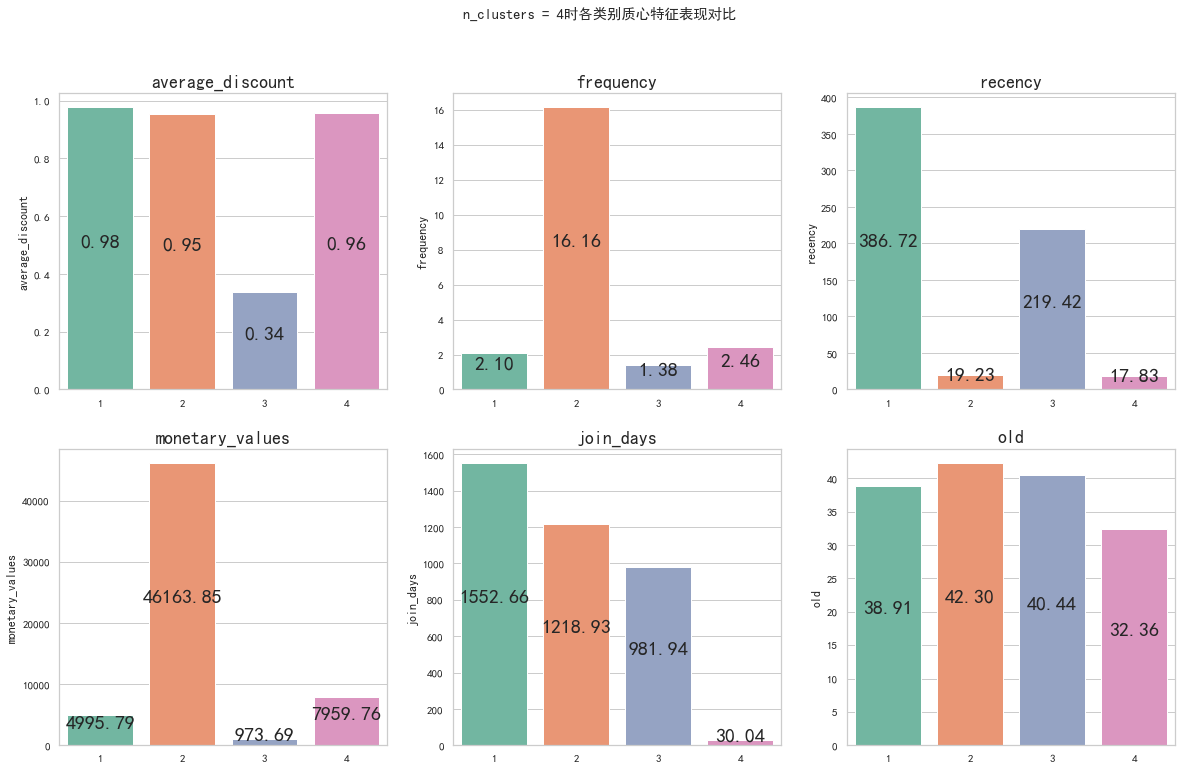

In [542]:
plt.figure(figsize = (20,12))
plt.subplot(231)
sns.barplot(data = df,
           x = df.index+1,
           y = 'average_discount')
for i in range(len(df.average_discount)):
    plt.text(x = i,
             y = df.average_discount[i]/2,
             s = '%.2f' % df.average_discount[i],
             ha = 'center',
             va = 'bottom',
             fontsize = 20)
plt.title(u'average_discount',fontsize = 18)
plt.subplot(232)
sns.barplot(data = df,
           x = df.index+1,
           y = 'frequency')
for i in range(len(df.frequency)):
    plt.text(x = i,
             y = df.frequency[i]/2,
             s = '%.2f' % df.frequency[i],
             ha = 'center',
             va = 'bottom',
             fontsize = 20)
plt.title(u'frequency',fontsize = 18)
plt.subplot(233)
sns.barplot(data = df,
           x = df.index+1,
           y = 'recency')
for i in range(len(df.recency)):
    plt.text(x = i,
             y = df.recency[i]/2,
             s = '%.2f' % df.recency[i],
             ha = 'center',
             va = 'bottom',
             fontsize = 20)
plt.title(u'recency',fontsize = 18)
plt.subplot(234)
sns.barplot(data = df,
           x = df.index+1,
           y = 'monetary_values')
for i in range(len(df.monetary_values)):
    plt.text(x = i,
             y = df.monetary_values[i]/2,
             s = '%.2f' % df.monetary_values[i],
             ha = 'center',
             va = 'bottom',
             fontsize = 20)
plt.title(u'monetary_values',fontsize = 18)
plt.subplot(235)
sns.barplot(data = df,
           x = df.index+1,
           y = 'join_days')
for i in range(len(df.join_days)):
    plt.text(x = i,
             y = df.join_days[i]/2,
             s = '%.2f' % df.join_days[i],
             ha = 'center',
             va = 'bottom',
             fontsize = 20)
plt.title(u'join_days',fontsize = 18)
plt.subplot(236)
sns.barplot(data = df,
           x = df.index+1,
           y = 'old')
for i in range(len(df.old)):
    plt.text(x = i,
             y = df.old[i]/2,
             s = '%.2f' % df.old[i],
             ha = 'center',
             va = 'bottom',
             fontsize = 20)
plt.title(u'old',fontsize = 18)
plt.suptitle(u'n_clusters = 4时各类别质心特征表现对比')
plt.show()

分析上图：
* <span class="girk">第一类</span>客户表现为最近一次消费时间较远，入会时间较长，并且占总人数比重接近66%的客群，这一部分客群可定义为<span class="girk">一般客户</span>。
* <span class="girk">第二类</span>客户具备了高消费频次(frequency)，最后一次消费时间(rencency)更近，消费总金额(monetary_values)更高的特征，这一类客户可定义为<span class="girk">重要价值客户</span>。
* <span class="girk">第三类</span>客户主要体现在对于折扣的敏感性层面，这一类客户虽然在消费总金额等核心价值指标(RFM)方面表现较差，但是如果可以使用针对性营销策略（例如进行打折促销活动），将有利于提升百货商场的业绩，那么这一类客户可以归类为<span class="girk">折扣敏感型客户</span>。
* <span class="girk">第四类</span>客户最大的特征为入会时间极短，但是平均消费金额较大，并有着不错的订单产出，故可将此类客户定义为<span class="girk">潜在培育价值客户</span>。